# Multithreding

# 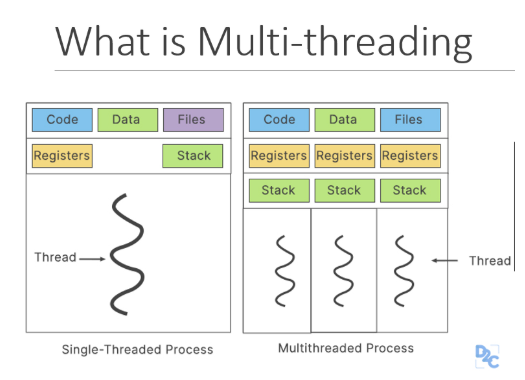

In [1]:
import time

In [3]:
def cube_data(num):
    """
    To generate cube of a num

    """
    #Introducing delay in time(around 5s) with time.sleep(number of seconds)
    time.sleep(5)
    print(f"cube of a number {num} is {num**3}")
    return num**3
    
    
    

In [4]:
cb_d=cube_data(4)

cube of a number 4 is 64


In [5]:
principal = 45000
rate = 12
num = 10

In [6]:
def simple_interest(p,n,r):
    # Introducing delay in time(around 3s) with time.sleep(number of seconds)
    time.sleep(3)
    print(f"Simple interest is {(p*n*r)/100}")
    return (p*n*r)/100

In [7]:
%%time
si1=simple_interest(principal,rate,num)
si1

Simple interest is 54000.0
CPU times: total: 0 ns
Wall time: 3 s


54000.0

In [10]:
%%time
from threading import Thread
th1=Thread(target=cube_data,args=(5,))
th2=Thread(target=simple_interest,args=(54000,12,8,))

th1.start()
th2.start()

th1.join()
th2.join()


Simple interest is 51840.0
cube of a number 5 is 125
CPU times: total: 15.6 ms
Wall time: 5.02 s


### Threads dont store outputs. We will have to store the results in a dictionary and print them


In [32]:
def factorial(num,results,key):
    time.sleep(3)
    p=1
    for i in range(1,num+1):
        p=p*i
    results[key]=p

In [12]:
d1="raman"

In [13]:
d1[0]

'r'

In [14]:
d1[::-1]

'namar'

In [15]:
d1==d1[::-1]

False

In [23]:
def palindrome(string,results,key):
    time.sleep(2)
    if string==string[::-1]:
        results[key]="palindrome"
    else:
        results[key]="not a palindrome"    

In [33]:
%%time
results={}
th3=Thread(target=factorial,args=(4,results,"factorial",))
th4=Thread(target=palindrome,args=("raman",results,"palindrome",))

th3.start()
th4.start()

th3.join()
th4.join()

print(f"factorial results are:{results["factorial"]},palindrome results are:{results["palindrome"]}")


factorial results are:24,palindrome results are:not a palindrome
CPU times: total: 15.6 ms
Wall time: 3.01 s


In [34]:
urls=["https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv",
"https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/test.csv",
"https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/train.csv"
]

In [35]:
for url in urls:
    print(url.split('/')[-1])

data.csv
test.csv
train.csv


In [36]:
from urllib.request import urlretrieve

In [40]:
def download_data(url_link):
    #Extract filename from url links
    file_name=url_link.split('/')[-1]
    print(f"{file_name} is downloading...")

    #retrieve content from the url and copy that to filename provided
    urlretrieve(url_link,filename=file_name)

    #print downloading status to user
    print(f"{file_name}got downloaded")


In [41]:
for url in urls:
    download_data(url)

data.csv is downloading...
data.csvgot downloaded
test.csv is downloading...
test.csvgot downloaded
train.csv is downloading...
train.csvgot downloaded


In [43]:
%%time
Threads=[]
for url in urls:
    thread=Thread(target=download_data,args=(url,))
    thread.start()

    Threads.append(thread)

for th in Threads:
    th.join()    

data.csv is downloading...
test.csv is downloading...
train.csv is downloading...
train.csvgot downloaded
test.csvgot downloaded
data.csvgot downloaded
CPU times: total: 953 ms
Wall time: 3.71 s
